In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [12]:
# Charger les différents ensembles de données

train_data = pd.read_csv('train.csv')

test_data = pd.read_csv('test.csv')

oil_data = pd.read_csv('oil.csv')

stores_data = pd.read_csv('stores.csv')

transactions_data = pd.read_csv('transactions.csv')

holidays_data = pd.read_csv('holidays_events.csv')

In [21]:
# Afficher les premières lignes de chaque ensemble de données et le nombre de valeurs manquantes
print("Train Data:")
print(train_data.head())
print("\nNombre de valeurs manquantes dans le Train Data:")
print(train_data.isnull().sum())

print("\nTest Data:")
print(test_data.head())
print("\nNombre de valeurs manquantes dans le Test Data:")
print(test_data.isnull().sum())

print("\nOil Data:")
print(oil_data.head())
print("\nNombre de valeurs manquantes dans l'Oil Data:")
print(oil_data.isnull().sum())

print("\nStores Data:")
print(stores_data.head())
print("\nNombre de valeurs manquantes dans le Stores Data:")
print(stores_data.isnull().sum())

print("\nTransactions Data:")
print(transactions_data.head())
print("\nNombre de valeurs manquantes dans le Transactions Data:")
print(transactions_data.isnull().sum())

print("\nHolidays Data:")
print(holidays_data.head())
print("\nNombre de valeurs manquantes dans le Holidays Data:")
print(holidays_data.isnull().sum())

Train Data:
   id        date  store_nbr      family  sales  onpromotion
0   0  2013-01-01          1  AUTOMOTIVE    0.0            0
1   1  2013-01-01          1   BABY CARE    0.0            0
2   2  2013-01-01          1      BEAUTY    0.0            0
3   3  2013-01-01          1   BEVERAGES    0.0            0
4   4  2013-01-01          1       BOOKS    0.0            0

Nombre de valeurs manquantes dans le Train Data:
id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

Test Data:
        id        date  store_nbr      family  onpromotion
0  3000888  2017-08-16          1  AUTOMOTIVE            0
1  3000889  2017-08-16          1   BABY CARE            0
2  3000890  2017-08-16          1      BEAUTY            2
3  3000891  2017-08-16          1   BEVERAGES           20
4  3000892  2017-08-16          1       BOOKS            0

Nombre de valeurs manquantes dans le Test Data:
id             0
date           0
store_nb

In [24]:
# Calculer la médiane de la colonne 'dcoilwtico'
median_oil_price = oil_data['dcoilwtico'].median()

# Remplacer les valeurs manquantes par la médiane
oil_data['dcoilwtico'].fillna(median_oil_price, inplace=True)

print(oil_data.isnull().sum())

date          0
dcoilwtico    0
dtype: int64


In [31]:
# Fusionner les données sur la colonne 'date'
combined_data_holiday = pd.merge(train_data, holidays_data, how='left', on='date')

# Remplacer les valeurs manquantes par 0
combined_data_holiday.fillna(0, inplace=True)

# Afficher les premières lignes du résultat et le nombre de valeurs manquantes
print("\nCombinaison Train et Holidays:")
print(combined_data_holiday.head())
print("\ny.Nombre de valeurs manquantes dans la combinaison :")
print(combined_data_holiday.isnull().sum())


Combinaison Train et Holidays:
   id       date  store_nbr      family  sales  onpromotion     type  \
0   0 2013-01-01          1  AUTOMOTIVE    0.0            0  Holiday   
1   1 2013-01-01          1   BABY CARE    0.0            0  Holiday   
2   2 2013-01-01          1      BEAUTY    0.0            0  Holiday   
3   3 2013-01-01          1   BEVERAGES    0.0            0  Holiday   
4   4 2013-01-01          1       BOOKS    0.0            0  Holiday   

     locale locale_name         description transferred  
0  National     Ecuador  Primer dia del ano       False  
1  National     Ecuador  Primer dia del ano       False  
2  National     Ecuador  Primer dia del ano       False  
3  National     Ecuador  Primer dia del ano       False  
4  National     Ecuador  Primer dia del ano       False  

Nombre de valeurs manquantes dans la combinaison :
id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
type           0
locale         0

In [41]:
# Convertir la colonne 'date' en format de date pour oil_data
oil_data['date'] = pd.to_datetime(oil_data['date'])

# Fusionner les données combinées avec 'oil_data' sur la colonne 'date'
combined_data_oil = pd.merge(combined_data_holiday, oil_data, how='left', on='date')

# Remplacer les valeurs NaN dans la colonne correspondante à prix du pétrole par 0
combined_data_oil['dcoilwtico'].fillna(0,inplace=True)

# Afficher les premières lignes du résultat et le nombre de valeurs manquantes
print("\nCombinaison Train, Holidays et Oil:")
print(combined_data_oil.head())
print("\ny.Nombre de valeurs manquantes dans la combinaison :")
print(combined_data_oil.isnull().sum())


Combinaison Train, Holidays et Oil:
   id       date  store_nbr      family  sales  onpromotion     type  \
0   0 2013-01-01          1  AUTOMOTIVE    0.0            0  Holiday   
1   1 2013-01-01          1   BABY CARE    0.0            0  Holiday   
2   2 2013-01-01          1      BEAUTY    0.0            0  Holiday   
3   3 2013-01-01          1   BEVERAGES    0.0            0  Holiday   
4   4 2013-01-01          1       BOOKS    0.0            0  Holiday   

     locale locale_name         description transferred  dcoilwtico  
0  National     Ecuador  Primer dia del ano       False       53.18  
1  National     Ecuador  Primer dia del ano       False       53.18  
2  National     Ecuador  Primer dia del ano       False       53.18  
3  National     Ecuador  Primer dia del ano       False       53.18  
4  National     Ecuador  Primer dia del ano       False       53.18  

y.Nombre de valeurs manquantes dans la combinaison :
id             0
date           0
store_nbr      0
famil

In [42]:
# Fusionner les données combinées avec 'stores_data' sur la colonne 'store_nbr'
combined_data_stores = pd.merge(combined_data_oil, stores_data, how='left', on='store_nbr')

# Afficher les premières lignes du résultat et le nombre de valeurs manquantes
print("\nCombinaison Train, Holidays, Oil et Stores:")
print(combined_data_stores.head())
print("\ny.Nombre de valeurs manquantes dans la combinaison :")
print(combined_data_stores.isnull().sum())


Combinaison Train, Holidays, Oil et Stores:
   id       date  store_nbr      family  sales  onpromotion   type_x  \
0   0 2013-01-01          1  AUTOMOTIVE    0.0            0  Holiday   
1   1 2013-01-01          1   BABY CARE    0.0            0  Holiday   
2   2 2013-01-01          1      BEAUTY    0.0            0  Holiday   
3   3 2013-01-01          1   BEVERAGES    0.0            0  Holiday   
4   4 2013-01-01          1       BOOKS    0.0            0  Holiday   

     locale locale_name         description transferred  dcoilwtico   city  \
0  National     Ecuador  Primer dia del ano       False       53.18  Quito   
1  National     Ecuador  Primer dia del ano       False       53.18  Quito   
2  National     Ecuador  Primer dia del ano       False       53.18  Quito   
3  National     Ecuador  Primer dia del ano       False       53.18  Quito   
4  National     Ecuador  Primer dia del ano       False       53.18  Quito   

       state type_y  cluster  
0  Pichincha      D   

In [46]:
# Convertir la colonne 'date' en format de date pour transactions_data
transactions_data['date'] = pd.to_datetime(transactions_data['date'])

# Fusionner les données combinées avec 'transactions_data' sur les colonnes 'date' et 'store_nbr'
final_data = pd.merge(combined_data_stores, transactions_data, how='left', on=['date', 'store_nbr'])

# Remplacer les valeurs NaN dans la colonne correspondante à transactions par 0
final_data['transactions'].fillna(0,inplace=True)

# Afficher les premières lignes du résultat et le nombre de valeurs manquantes
print("\nCombinaison Train, Holidays, Oil, Stores et Transactions:")
print(final_data.head())
print("\ny.Nombre de valeurs manquantes dans la combinaison :")
print(final_data.isnull().sum())


Combinaison Train, Holidays, Oil, Stores et Transactions:
   id       date  store_nbr      family  sales  onpromotion   type_x  \
0   0 2013-01-01          1  AUTOMOTIVE    0.0            0  Holiday   
1   1 2013-01-01          1   BABY CARE    0.0            0  Holiday   
2   2 2013-01-01          1      BEAUTY    0.0            0  Holiday   
3   3 2013-01-01          1   BEVERAGES    0.0            0  Holiday   
4   4 2013-01-01          1       BOOKS    0.0            0  Holiday   

     locale locale_name         description transferred  dcoilwtico   city  \
0  National     Ecuador  Primer dia del ano       False       53.18  Quito   
1  National     Ecuador  Primer dia del ano       False       53.18  Quito   
2  National     Ecuador  Primer dia del ano       False       53.18  Quito   
3  National     Ecuador  Primer dia del ano       False       53.18  Quito   
4  National     Ecuador  Primer dia del ano       False       53.18  Quito   

       state type_y  cluster  transacti

In [63]:
#1 Analyse des ventes au fil du temps :

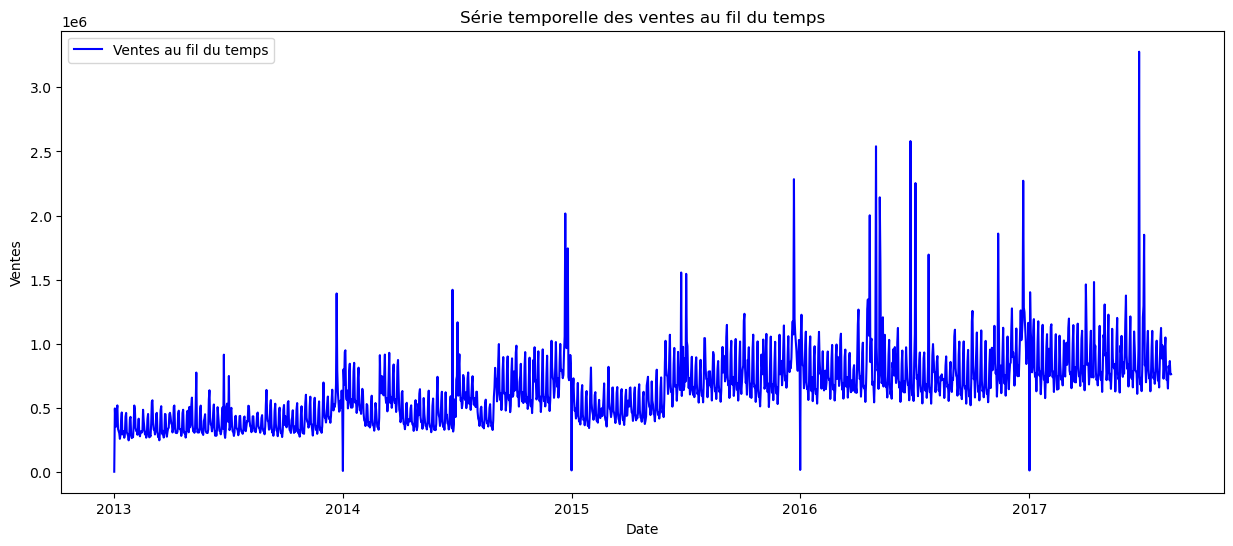

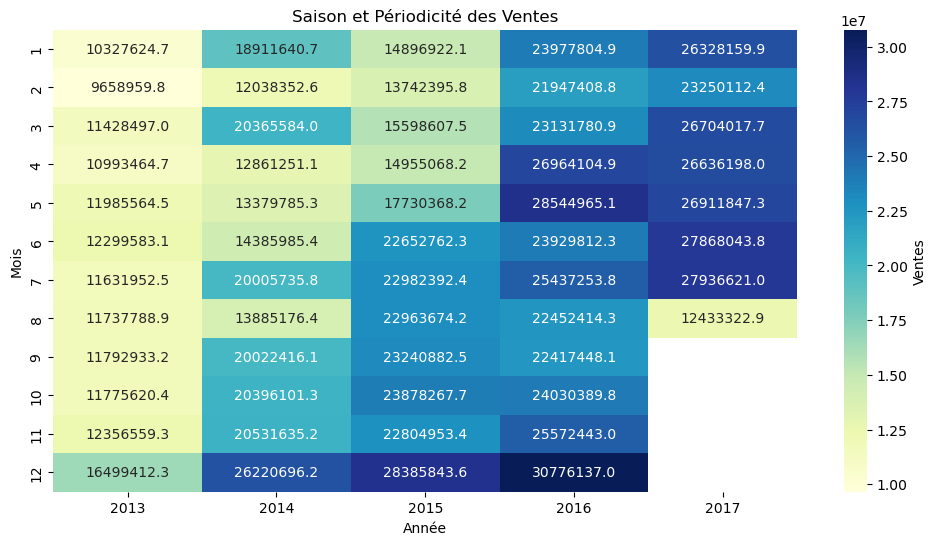

In [49]:
# Créer une série temporelle des ventes
sales_time_series = final_data.groupby('date')['sales'].sum()

# Tracer la série temporelle des ventes
plt.figure(figsize=(15, 6))
plt.plot(sales_time_series, label='Ventes au fil du temps', color='blue')
plt.title('Série temporelle des ventes au fil du temps')
plt.xlabel('Date')
plt.ylabel('Ventes')
plt.legend()
plt.show()

# Explorer la saisonnalité avec un heatmap
sales_seasonality = final_data.pivot_table(index=final_data['date'].dt.month, columns=final_data['date'].dt.year, values='sales', aggfunc='sum')
plt.figure(figsize=(12, 6))
sns.heatmap(sales_seasonality, cmap='YlGnBu', annot=True, fmt=".1f", cbar_kws={'label': 'Ventes'})
plt.title('Saison et Périodicité des Ventes')
plt.xlabel('Année')
plt.ylabel('Mois')
plt.show()

In [62]:
#2 Analyse des ventes par magasin :

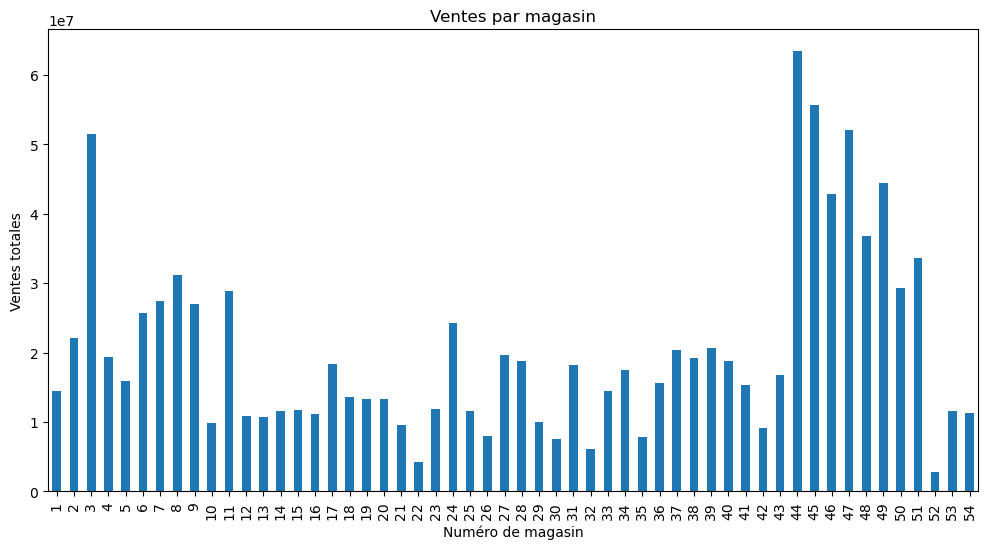

In [51]:
# Calculer les ventes totales par magasin :
sales_by_store = final_data.groupby('store_nbr')['sales'].sum()

#Visualiser les ventes par magasin :
plt.figure(figsize=(12, 6))
sales_by_store.plot(kind='bar')
plt.title('Ventes par magasin')
plt.xlabel('Numéro de magasin')
plt.ylabel('Ventes totales')
plt.show()

In [52]:
# Identifier les magasins les plus performants et les moins performants :
top_stores = sales_by_store.sort_values(ascending=False).head(5)
bottom_stores = sales_by_store.sort_values().head(5)

print("Magasins les plus performants :\n", top_stores)
print("\nMagasins les moins performants :\n", bottom_stores)

Magasins les plus performants :
 store_nbr
44    6.335614e+07
45    5.568902e+07
47    5.202448e+07
3     5.153353e+07
49    4.434682e+07
Name: sales, dtype: float64

Magasins les moins performants :
 store_nbr
52    2.764970e+06
22    4.201150e+06
32    6.070115e+06
30    7.538101e+06
35    7.822669e+06
Name: sales, dtype: float64


In [60]:
### Analyser les tendances spécifiques à chaque magasin :

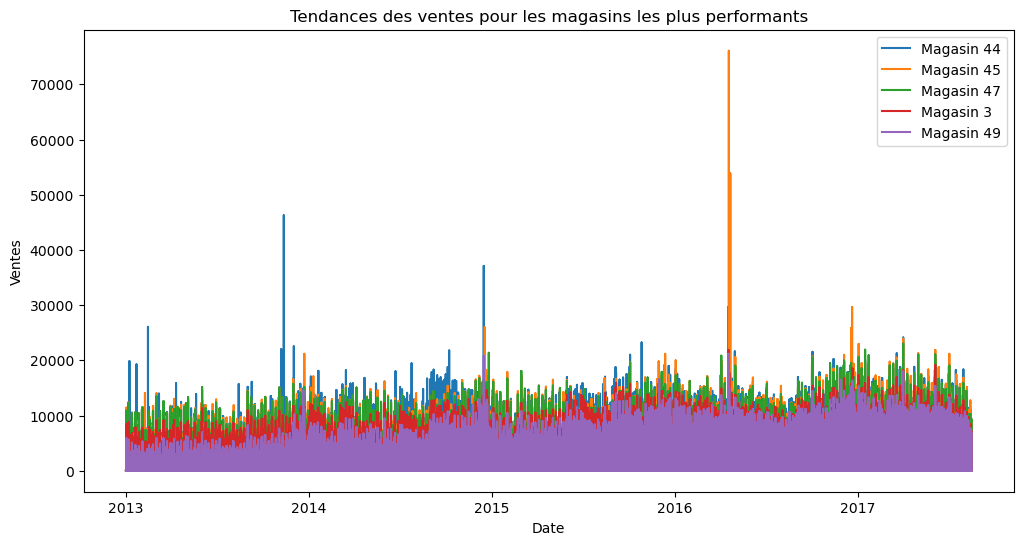

In [55]:
# Tendances des ventes pour les magasins les plus performants
plt.figure(figsize=(12, 6))
for store_nbr in top_stores.index:
    store_data = final_data[final_data['store_nbr'] == store_nbr]
    plt.plot(store_data['date'], store_data['sales'], label=f'Magasin {store_nbr}')

plt.title('Tendances des ventes pour les magasins les plus performants')
plt.xlabel('Date')
plt.ylabel('Ventes')
plt.legend()
plt.show()


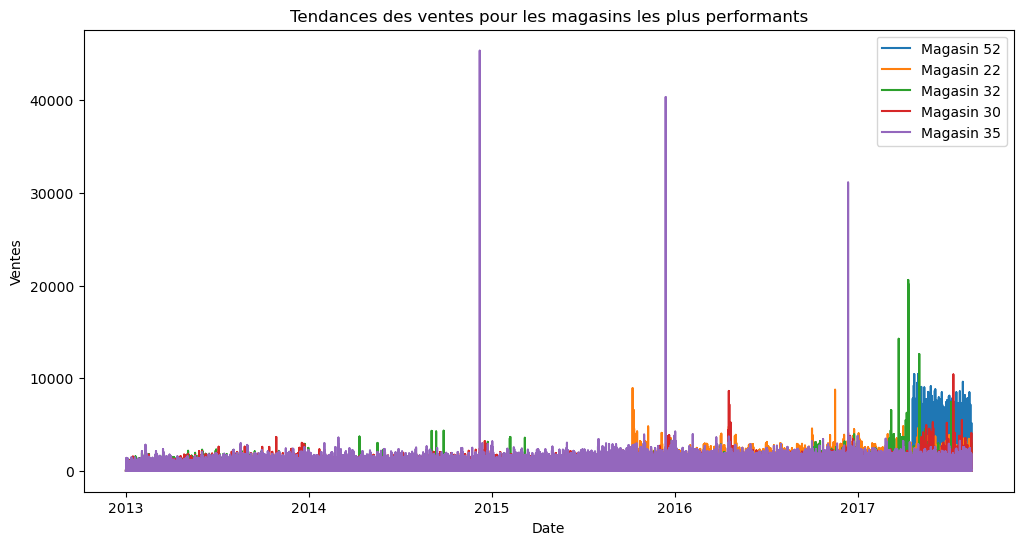

In [56]:
# Tendances des ventes pour les magasins les moins performants
plt.figure(figsize=(12, 6))
for store_nbr in bottom_stores.index:
    store_data = final_data[final_data['store_nbr'] == store_nbr]
    plt.plot(store_data['date'], store_data['sales'], label=f'Magasin {store_nbr}')

plt.title('Tendances des ventes pour les magasins les plus performants')
plt.xlabel('Date')
plt.ylabel('Ventes')
plt.legend()
plt.show()

In [61]:
#3 Visualiser l'impact des jours fériés sur les ventes

In [64]:
# Créer une colonne pour indiquer si un jour est férié :
final_data['is_holiday'] = final_data['type_x'] == 'Holiday'

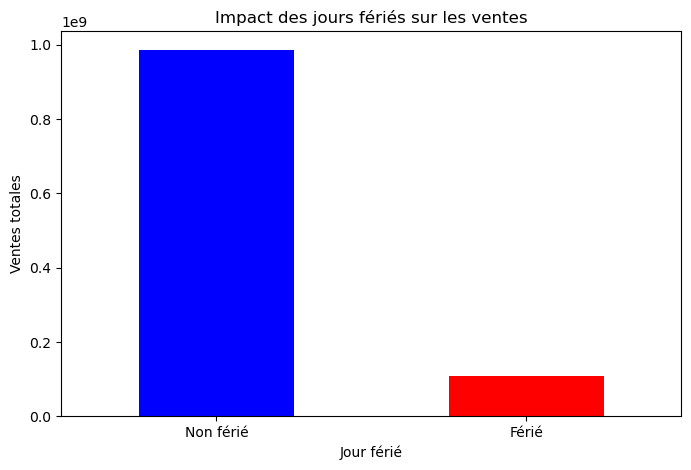

In [65]:
## Visualiser l'impact des jours fériés sur les ventes totales :
sales_by_holiday = final_data.groupby('is_holiday')['sales'].sum()

plt.figure(figsize=(8, 5))
sales_by_holiday.plot(kind='bar', color=['blue', 'red'])
plt.title("Impact des jours fériés sur les ventes")
plt.xlabel("Jour férié")
plt.ylabel("Ventes totales")
plt.xticks([0, 1], ['Non férié', 'Férié'], rotation=0)
plt.show()

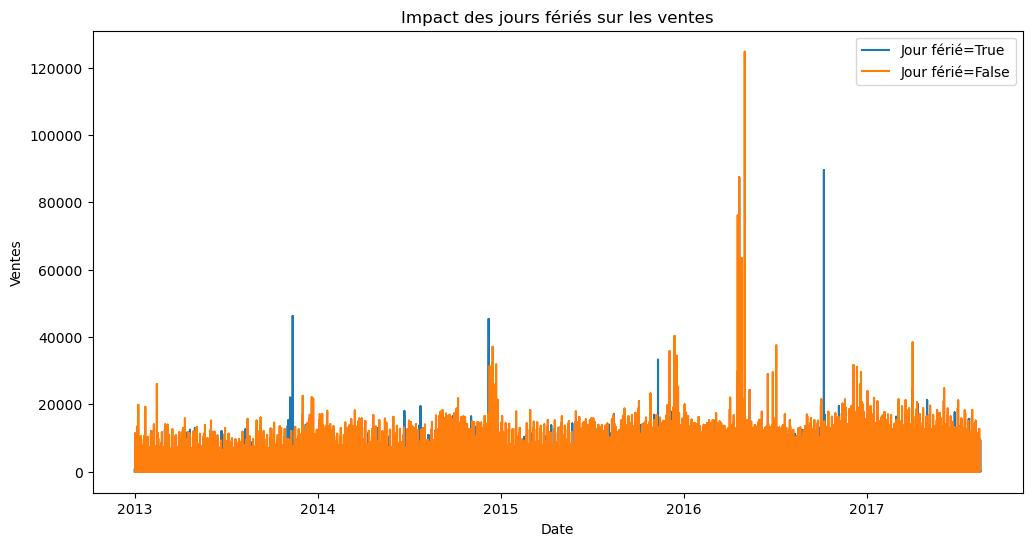

In [66]:
### Visualiser les ventes les jours fériés par rapport aux jours normaux :
plt.figure(figsize=(12, 6))
for holiday_status in [True, False]:
    holiday_data = final_data[final_data['is_holiday'] == holiday_status]
    plt.plot(holiday_data['date'], holiday_data['sales'], label=f'Jour férié={holiday_status}')

plt.title('Impact des jours fériés sur les ventes')
plt.xlabel('Date')
plt.ylabel('Ventes')
plt.legend()
plt.show()

In [67]:
#4 Relation entre les promotions et les ventes :

In [68]:
# Créer une colonne pour indiquer si un produit est en promotion :
final_data['is_promotion'] = final_data['onpromotion'] == 1

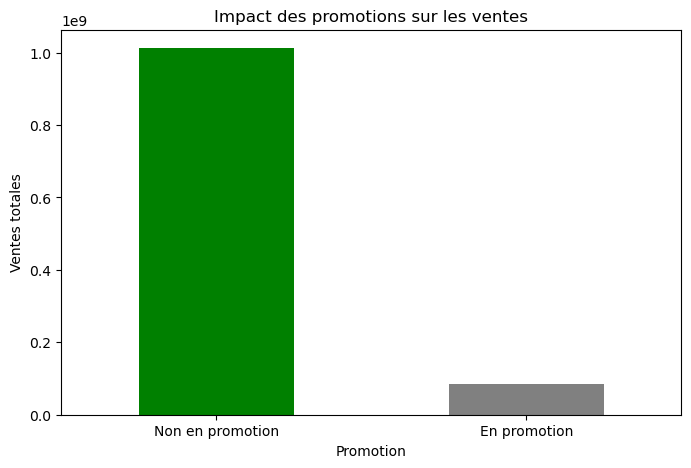

In [69]:
## Visualiser l'impact des promotions sur les ventes totales :
sales_by_promotion = final_data.groupby('is_promotion')['sales'].sum()

plt.figure(figsize=(8, 5))
sales_by_promotion.plot(kind='bar', color=['green', 'grey'])
plt.title("Impact des promotions sur les ventes")
plt.xlabel("Promotion")
plt.ylabel("Ventes totales")
plt.xticks([0, 1], ['Non en promotion', 'En promotion'], rotation=0)
plt.show()

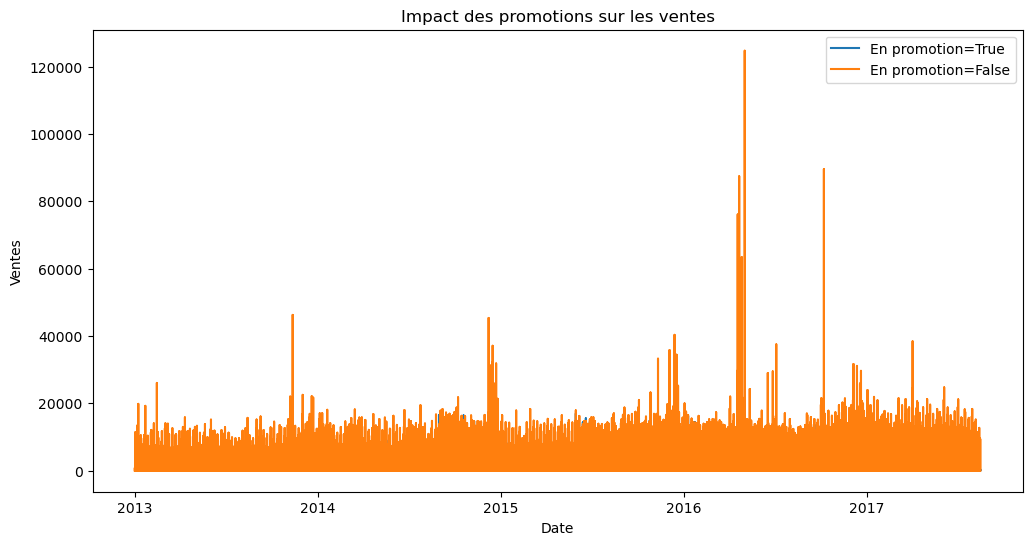

In [70]:
### Visualiser les ventes des produits en promotion par rapport à ceux qui ne le sont pas :
plt.figure(figsize=(12, 6))
for promotion_status in [True, False]:
    promotion_data = final_data[final_data['is_promotion'] == promotion_status]
    plt.plot(promotion_data['date'], promotion_data['sales'], label=f'En promotion={promotion_status}')

plt.title('Impact des promotions sur les ventes')
plt.xlabel('Date')
plt.ylabel('Ventes')
plt.legend()
plt.show()

In [74]:
#5 Corrélation entre les variables :

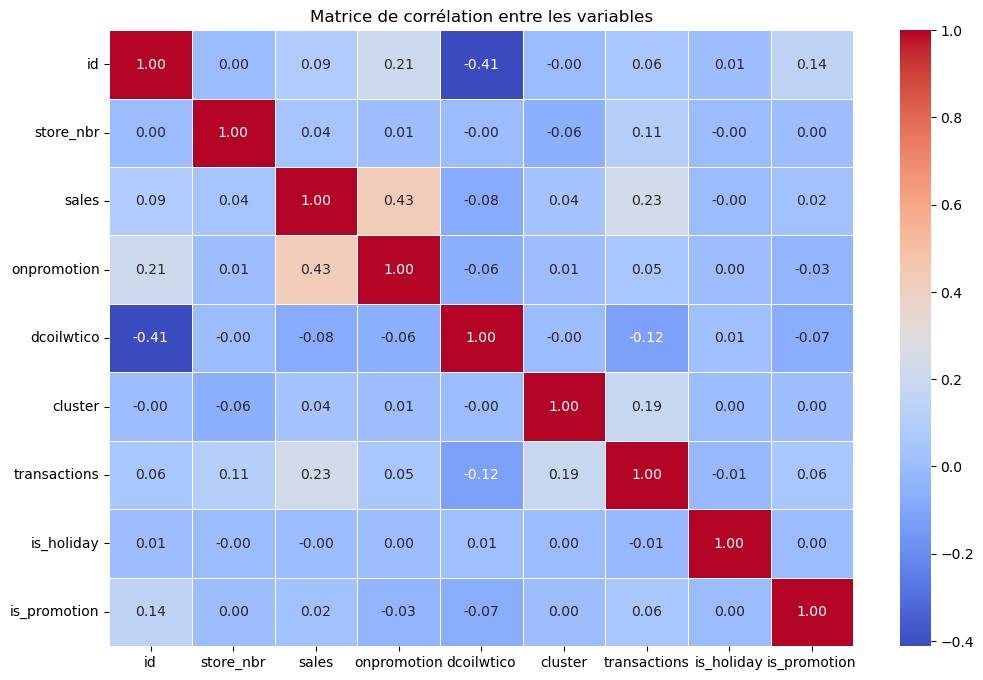

In [76]:
# Calculer la matrice de corrélation
correlation_matrix = final_data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Matrice de corrélation entre les variables')
plt.show()

In [77]:
#6 Distribution des transactions :

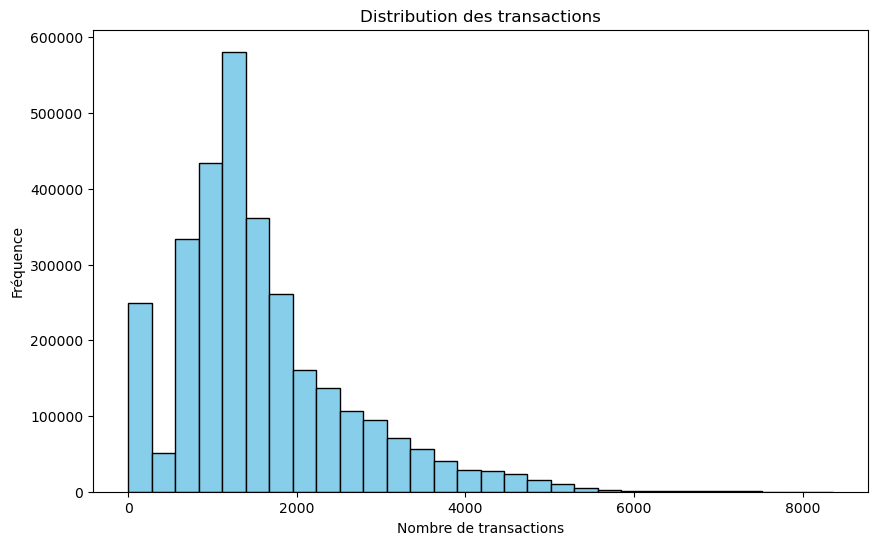

In [78]:
# Plot de l'histogramme des transactions
plt.figure(figsize=(10, 6))
plt.hist(final_data['transactions'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution des transactions')
plt.xlabel('Nombre de transactions')
plt.ylabel('Fréquence')
plt.show()

In [81]:
#6 Identifier les jours fériés transférés :

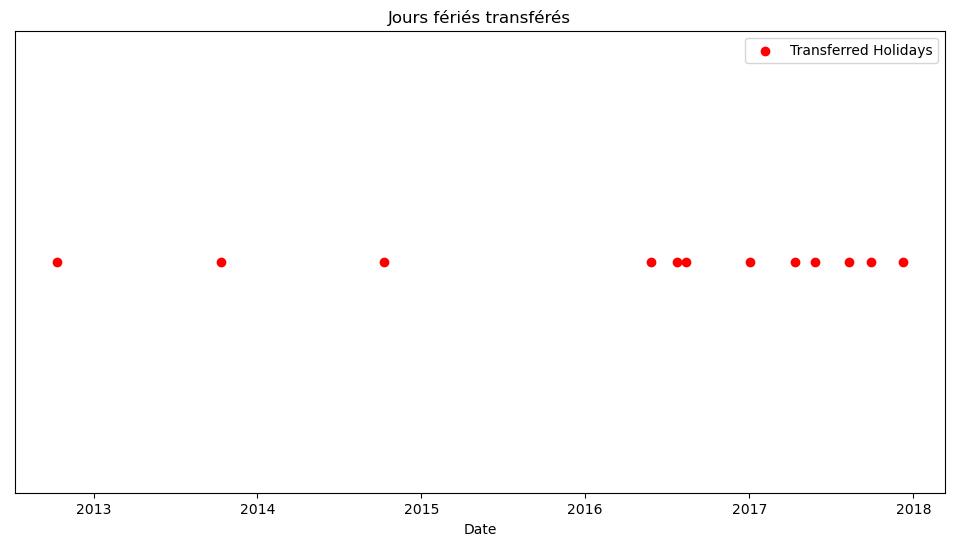

In [79]:
# Filtrer les jours transférés
transferred_holidays = holidays_data[holidays_data['type'] == 'Transfer']

# Visualiser les jours transférés
plt.figure(figsize=(12, 6))
plt.scatter(transferred_holidays['date'], [0] * len(transferred_holidays), color='red', label='Transferred Holidays')
plt.title("Jours fériés transférés")
plt.xlabel("Date")
plt.yticks([])  # Cacher l'axe y
plt.legend()
plt.show()

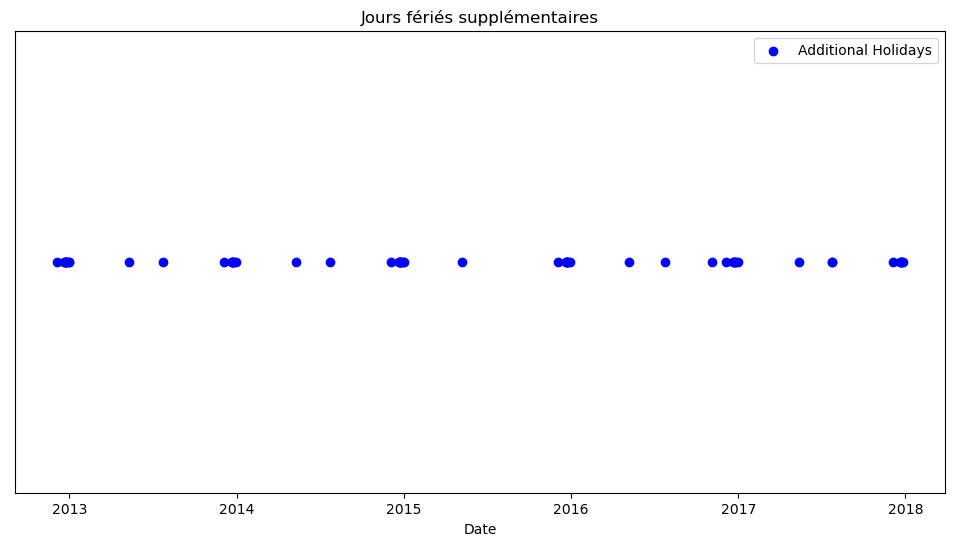

In [80]:
# Filtrer les jours de type "Bridge" ou "Additional"
additional_holidays = holidays_data[(holidays_data['type'] == 'Bridge') | (holidays_data['type'] == 'Additional')]

# Visualiser les jours supplémentaires
plt.figure(figsize=(12, 6))
plt.scatter(additional_holidays['date'], [0] * len(additional_holidays), color='blue', label='Additional Holidays')
plt.title("Jours fériés supplémentaires")
plt.xlabel("Date")
plt.yticks([])  # Cacher l'axe y
plt.legend()
plt.show()